In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('/kaggle/input/ev-statewise/DATASET.csv')
columns = data.columns
print(columns)

Index(['SL No.', 'State/UT', 'Electric 3-8-2023', 'Non-electric',
       'Till date State wise - Total Number of Vehicles Registered 14-7-2023',
       'Till date State wise - Total Vehicle Registered as Electric',
       'Proportion of Electric Vehicle', 'Electric Vehicle Count 6-3-2023',
       'No. of Operational PCS 24-3-2023',
       'No. of EV Chargers Sanctioned 17-3-2023', 'NH No. feb 2021',
       'Land Area (Ha.)', 'NO. OF EVs as on 30-11-2022',
       'no. of EVs as on 7-12-2022',
       'No. of Electric Vehicle (EV) Chargers Sanctioned 16-12-2022',
       'No. of RO's where EV Charging Facility Available 1-7-2023'],
      dtype='object')


In [15]:
data = pd.read_csv('/kaggle/input/ev-statewise/DATASET.csv')  
data.drop(['SL No.', 'State/UT'], axis=1, inplace=True)
data.fillna(0, inplace=True)  
X = data.drop('Proportion of Electric Vehicle', axis=1)
y = data['Proportion of Electric Vehicle']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestRegressor()  
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 1.0345467424982786
Test RMSE: 0.38917584232580504


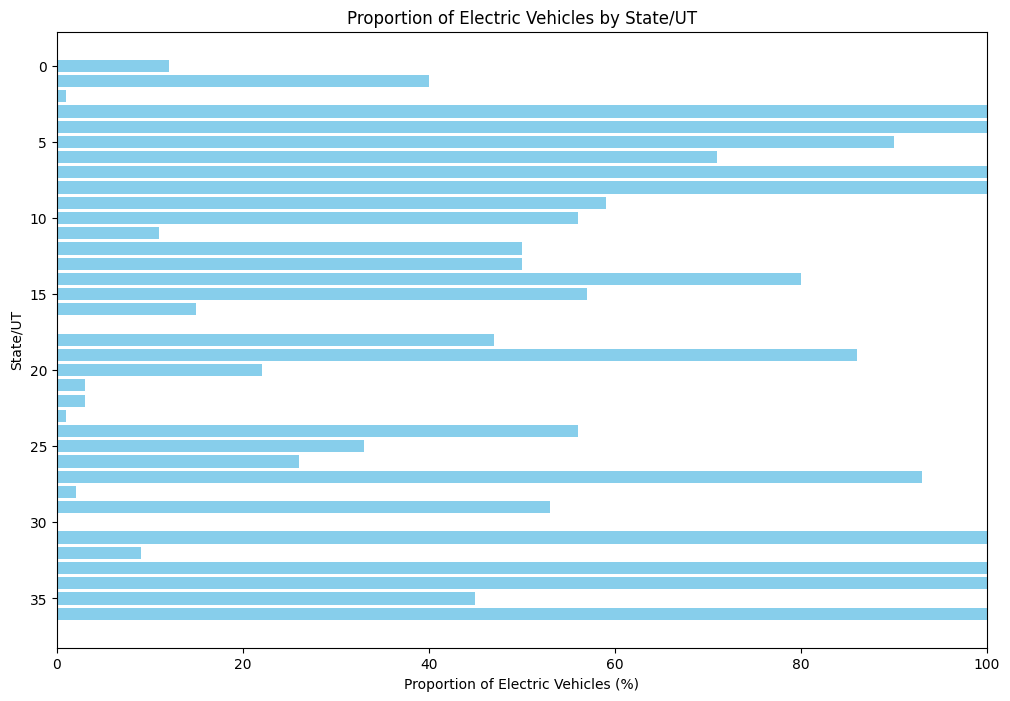

In [17]:
plot_data_sorted = data.sort_values(by='Proportion of Electric Vehicle')
plt.figure(figsize=(12, 8))
plt.barh(plot_data_sorted.index, plot_data_sorted['Proportion of Electric Vehicle']*100, color='skyblue')
plt.xlabel('Proportion of Electric Vehicles (%)')
plt.ylabel('State/UT')
plt.title('Proportion of Electric Vehicles by State/UT')
plt.gca().invert_yaxis()  
plt.xlim(0, 100)
plt.show()